<a href="https://colab.research.google.com/github/suryakanthPS/DS-Workbooks/blob/main/0618_EDA_1_Latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

In [ ]:
#whenever doing a analysis load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/data_clean.csv",index_col=0)

In [ ]:
data

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67,5,1,2010,67,S
2,36.0,118.0,8.0,72,5,2,2010,72,C
3,12.0,149.0,12.6,74,5,3,2010,74,PS
4,18.0,313.0,11.5,62,5,4,2010,62,S
5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
154,41.0,190.0,7.4,67,5,1,2010,67,C
155,30.0,193.0,6.9,70,9,26,2010,70,PS
156,NaN,145.0,13.2,77,9,27,2010,77,S
157,14.0,191.0,14.3,75,9,28,2010,75,S


In [ ]:
data.tail(10)

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
149,30.0,193.0,6.9,70,9,26,2010,70,C
150,NaN,145.0,13.2,77,9,27,2010,77,PS
151,14.0,191.0,14.3,75,9,28,2010,75,S
152,18.0,131.0,8.0,76,9,29,2010,76,PS
153,20.0,223.0,11.5,68,9,30,2010,68,S
154,41.0,190.0,7.4,67,5,1,2010,67,C
155,30.0,193.0,6.9,70,9,26,2010,70,PS
156,NaN,145.0,13.2,77,9,27,2010,77,S
157,14.0,191.0,14.3,75,9,28,2010,75,S
158,18.0,131.0,8.0,76,9,29,2010,76,C


In [ ]:
#Data Structure 
type(data)
data.shape

(158, 9)

In [ ]:
#data types
data.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Temp C      object
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

# Data type conversion - time stamp: 11.13

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   158 non-null    object 
 4   Month    158 non-null    object 
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 12.3+ KB


In [ ]:
#we dont want month,temp,weather as a object we need to convert to numeric data
#to attain that to_datatype and errors = coerce
#coerce will introduce NA values for non numeric data in the columns
data['Month']=pd.to_numeric(data['Month'],errors='coerce')
data['Temp C']=pd.to_numeric(data['Temp C'],errors='coerce')
data['Weather']=data['Weather'].astype('category')           #data['Wind']=data['Wind'].astype('int64')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    120 non-null    float64 
 1   Solar.R  151 non-null    float64 
 2   Wind     158 non-null    float64 
 3   Temp C   157 non-null    float64 
 4   Month    157 non-null    float64 
 5   Day      158 non-null    int64   
 6   Year     158 non-null    int64   
 7   Temp     158 non-null    int64   
 8   Weather  155 non-null    category
dtypes: category(1), float64(5), int64(3)
memory usage: 11.4 KB


####More on data type conversions
[link text](https://stackoverflow.com/questions/15891038/change-column-type-in-pandas)

## Duplicates - Time stamp: 11.14

# Drop rows

In [ ]:
#Count of duplicated rows
data[data.duplicated()].shape

(1, 9)

In [ ]:
data

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67.0,5.0,1,2010,67,S
2,36.0,118.0,8.0,72.0,5.0,2,2010,72,C
3,12.0,149.0,12.6,74.0,5.0,3,2010,74,PS
4,18.0,313.0,11.5,62.0,5.0,4,2010,62,S
5,NaN,NaN,14.3,56.0,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
154,41.0,190.0,7.4,67.0,5.0,1,2010,67,C
155,30.0,193.0,6.9,70.0,9.0,26,2010,70,PS
156,NaN,145.0,13.2,77.0,9.0,27,2010,77,S
157,14.0,191.0,14.3,75.0,9.0,28,2010,75,S


In [ ]:
#Print the duplicated rows
data[data.duplicated()]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
157,14.0,191.0,14.3,75.0,9.0,28,2010,75,S


In [ ]:
data_cleaned1=data.drop_duplicates()

In [ ]:
data_cleaned1.shape

(157, 9)

# Drop columns

In [ ]:
#axis =1 means coloumn axix 0 means rows
data_cleaned2=data_cleaned1.drop('Temp C',axis=1)

In [ ]:
data_cleaned2

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5.0,1,2010,67,S
2,36.0,118.0,8.0,5.0,2,2010,72,C
3,12.0,149.0,12.6,5.0,3,2010,74,PS
4,18.0,313.0,11.5,5.0,4,2010,62,S
5,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9.0,30,2010,68,S
154,41.0,190.0,7.4,5.0,1,2010,67,C
155,30.0,193.0,6.9,9.0,26,2010,70,PS
156,NaN,145.0,13.2,9.0,27,2010,77,S


# for exporting the table from colab to excel

In [ ]:
from google.colab import files

data.to_csv('output.csv', encoding = 'utf-8-sig') 
files.download('output.csv')

# To display max column in dataset if it has more columns

In [ ]:
pd.set_option('display.max.columns', None)
data_cleaned2

# Rename the columns - Time stamp: 11.22

In [ ]:
#rename the Solar column
data_cleaned3 = data_cleaned2.rename({'Solar.R': 'Solar'}, axis=1)

In [ ]:
data_cleaned3

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5.0,1,2010,67,S
2,36.0,118.0,8.0,5.0,2,2010,72,C
3,12.0,149.0,12.6,5.0,3,2010,74,PS
4,18.0,313.0,11.5,5.0,4,2010,62,S
5,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9.0,30,2010,68,S
154,41.0,190.0,7.4,5.0,1,2010,67,C
155,30.0,193.0,6.9,9.0,26,2010,70,PS
156,NaN,145.0,13.2,9.0,27,2010,77,S


# Outlier Detection

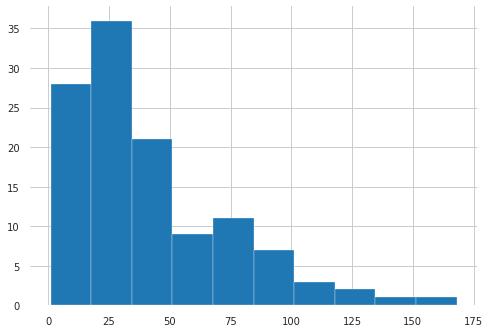

In [ ]:
# histogram of Ozone
data_cleaned3['Ozone'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f948995a2d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f948995ad50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9489954d50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9489960850>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9489960d90>],
 'means': []}

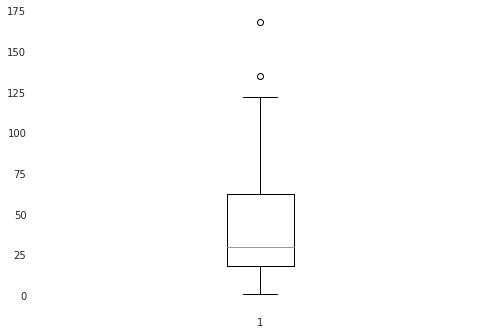

In [ ]:
#Box plot for ozone column
data_box=data_cleaned3.dropna()
data1_box=data_box.Ozone
plt.boxplot(data1_box)

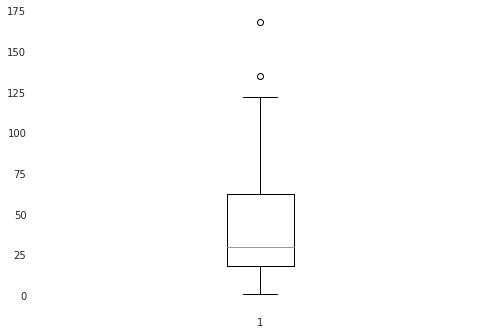

In [ ]:
#Extracting outliers
box=plt.boxplot(data1_box)

In [ ]:
#fliers are outliers
#ozone value 135 and 168 are outliers
[item.get_ydata() for item in box['fliers']]

[array([135., 168.])]

In [ ]:
#To get the whiskers
#any value before 1 and after 122 will become outlier
[item.get_ydata()[1] for item in box['whiskers']]

[1.0, 122.0]

In [ ]:
#Descriptive stat
data_cleaned3['Ozone'].describe()

count    119.000000
mean      41.815126
std       32.659249
min        1.000000
25%       18.000000
50%       31.000000
75%       62.000000
max      168.000000
Name: Ozone, dtype: float64

In [ ]:
data_cleaned3

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5.0,1,2010,67,S
2,36.0,118.0,8.0,5.0,2,2010,72,C
3,12.0,149.0,12.6,5.0,3,2010,74,PS
4,18.0,313.0,11.5,5.0,4,2010,62,S
5,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9.0,30,2010,68,S
154,41.0,190.0,7.4,5.0,1,2010,67,C
155,30.0,193.0,6.9,9.0,26,2010,70,PS
156,NaN,145.0,13.2,9.0,27,2010,77,S


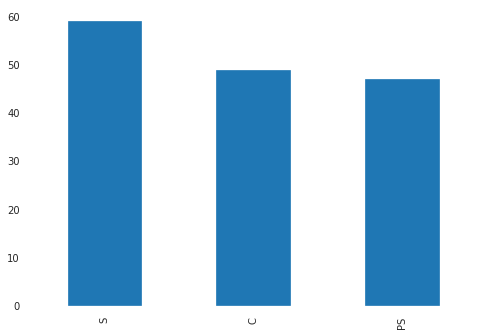

In [ ]:
#Bar plot
data['Weather'].value_counts().plot.bar()

# Missing Values and Imputation - Time stamp: 11.33



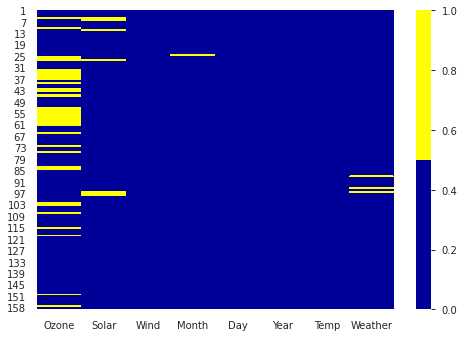

In [ ]:
import seaborn as sns
#provide a heatmap for whatever the value is null
#for null values use color yellow hexadecimalcode-fff000 & rest use blue hexadecimalcode-000099
cols = data_cleaned3.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data_cleaned3[cols].isnull(),
            cmap=sns.color_palette(colours))
# by heatmap we see in month there is only one missing value and in year and temp there is no missing value and in ozone there is many missing value

In [ ]:
#display null values
data_cleaned3[data_cleaned3.isnull().any(axis=1)].head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
5,NaN,NaN,14.3,5.0,5,2010,56,S
6,28.0,NaN,14.9,5.0,6,2010,66,C
10,NaN,194.0,8.6,5.0,10,2010,69,S
11,7.0,NaN,6.9,5.0,11,2010,74,C
24,32.0,92.0,12.0,NaN,24,2010,61,C


In [ ]:
#no of null valus in each coloumn
data_cleaned3.isnull().sum()


Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [ ]:
#Mean Imputation
#for numerical qwe will replace with mean or median
#for categorical we will replace with mode
mean = data_cleaned3['Ozone'].mean()
print(mean)

41.81512605042017


In [ ]:
#we will find the mean for non-missing values and replace it with missing values
#isnull is to find the null values
#fillna is to fill the null values
#dropna is to drop null values
data_cleaned3['Ozone'] = data_cleaned3['Ozone'].fillna(mean)
#check the 5th row in ozone it took the mean value istead of nan

In [ ]:
data_cleaned3

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
1,41.000000,190.0,7.4,5.0,1,2010,67,S
2,36.000000,118.0,8.0,5.0,2,2010,72,C
3,12.000000,149.0,12.6,5.0,3,2010,74,PS
4,18.000000,313.0,11.5,5.0,4,2010,62,S
5,41.815126,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,20.000000,223.0,11.5,9.0,30,2010,68,S
154,41.000000,190.0,7.4,5.0,1,2010,67,C
155,30.000000,193.0,6.9,9.0,26,2010,70,PS
156,41.815126,145.0,13.2,9.0,27,2010,77,S


In [ ]:
#Missing value imputation for categorical vlaue
#Get the object columns for weather
obj_columns=data_cleaned3[['Weather']]

In [ ]:
obj_columns.isnull().sum()

Weather    3
dtype: int64

In [ ]:
#Missing value imputation for categorical vlaue
#for categorical data replace with mode
obj_columns=obj_columns.fillna(obj_columns.mode().iloc[0])

In [ ]:
obj_columns.isnull().sum()

Weather    0
dtype: int64

In [ ]:
data_cleaned3

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
1,41.000000,190.0,7.4,5.0,1,2010,67,S
2,36.000000,118.0,8.0,5.0,2,2010,72,C
3,12.000000,149.0,12.6,5.0,3,2010,74,PS
4,18.000000,313.0,11.5,5.0,4,2010,62,S
5,41.815126,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,20.000000,223.0,11.5,9.0,30,2010,68,S
154,41.000000,190.0,7.4,5.0,1,2010,67,C
155,30.000000,193.0,6.9,9.0,26,2010,70,PS
156,41.815126,145.0,13.2,9.0,27,2010,77,S


In [ ]:
obj_columns.shape

(157, 1)

In [ ]:
#data_cleaned4=data_cleaned3.drop(['Weather'],axis=1,inplace=True)

In [ ]:
#Join the data set with imputed object dataset
data_cleaned4=pd.concat([data_cleaned3,obj_columns],axis=1)

In [ ]:
data_cleaned4.isnull().sum()

Ozone      0
Solar      7
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
Weather    0
dtype: int64

In [ ]:
data_cleaned4

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,Weather
1,41.000000,190.0,7.4,5.0,1,2010,67,S,S
2,36.000000,118.0,8.0,5.0,2,2010,72,C,C
3,12.000000,149.0,12.6,5.0,3,2010,74,PS,PS
4,18.000000,313.0,11.5,5.0,4,2010,62,S,S
5,41.815126,NaN,14.3,5.0,5,2010,56,S,S
...,...,...,...,...,...,...,...,...,...
153,20.000000,223.0,11.5,9.0,30,2010,68,S,S
154,41.000000,190.0,7.4,5.0,1,2010,67,C,C
155,30.000000,193.0,6.9,9.0,26,2010,70,PS,PS
156,41.815126,145.0,13.2,9.0,27,2010,77,S,S


# Scatter plot and Correlation analysis - Time stamp:11.47

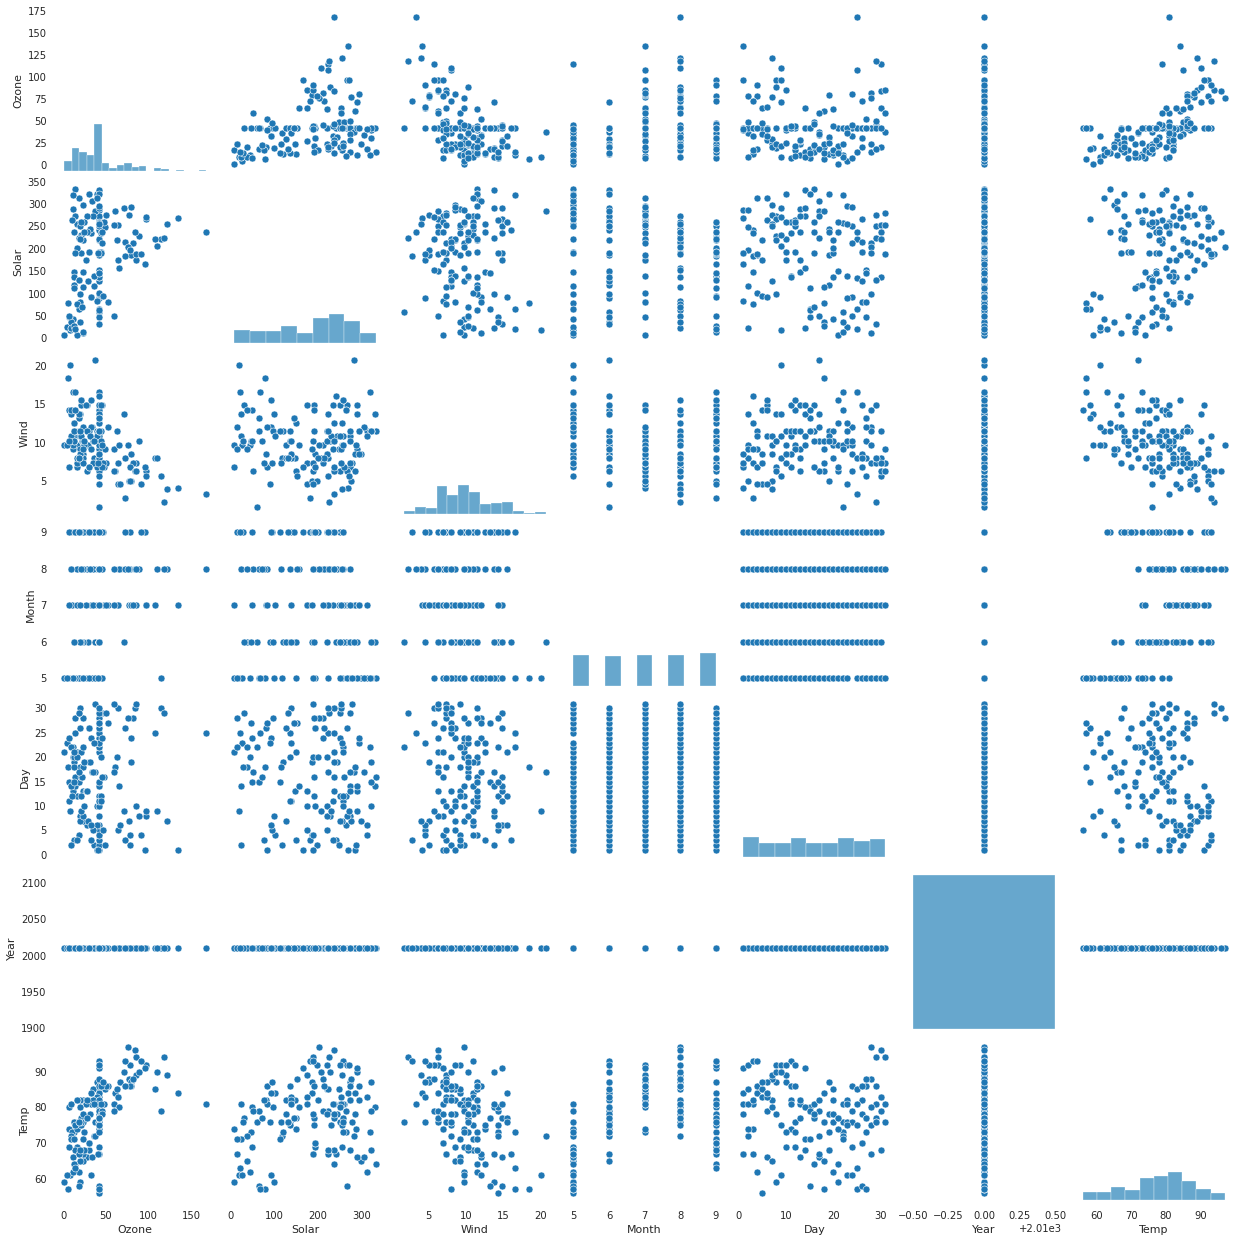

In [ ]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(data_cleaned3)
#in this ozone against ozone will be a histogram & ozone against other values will be a scatter plot
#same for other columns also

In [ ]:
#Correlation matrix
data_cleaned3.corr()

,Ozone,Solar,Wind,Month,Day,Year,Temp
Ozone,1.000000,0.308687,-0.520004,0.132860,-0.021916,NaN,0.606500
Solar,0.308687,1.000000,-0.057407,-0.094012,-0.155663,NaN,0.273558
Wind,-0.520004,-0.057407,1.000000,-0.166216,0.029900,NaN,-0.441228
Month,0.132860,-0.094012,-0.166216,1.000000,0.050055,NaN,0.398516
Day,-0.021916,-0.155663,0.029900,0.050055,1.000000,NaN,-0.122787
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temp,0.606500,0.273558,-0.441228,0.398516,-0.122787,NaN,1.000000


# Transformations

#### Dummy Variable

In [ ]:
#dummy ariables are to be created when we want to convert catergoricacl data to numerical data
data_cleaned4

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
1,41.0,190.0,7.4,67.0,5.0,1,2010,67,0,0,1
2,36.0,118.0,8.0,72.0,5.0,2,2010,72,1,0,0
3,12.0,149.0,12.6,74.0,5.0,3,2010,74,0,1,0
4,18.0,313.0,11.5,62.0,5.0,4,2010,62,0,0,1
7,23.0,299.0,8.6,65.0,5.0,7,2010,65,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,68.0,9.0,30,2010,68,0,0,1
154,41.0,190.0,7.4,67.0,5.0,1,2010,67,1,0,0
155,30.0,193.0,6.9,70.0,9.0,26,2010,70,0,1,0
157,14.0,191.0,14.3,75.0,9.0,28,2010,75,0,0,1


In [ ]:
#Creating dummy variable for Weather column
#to create a dmmy variable we need to use get_dummies
data_cleaned4=pd.get_dummies(data,columns=['Weather'])
#whenever we have c it will become 1 if it is not present it will be 0 in Weather_C
#whenever we have ps it will become 1 if it is not present it will be 0 in Weather_PS
#whenever we have s it will become 1 if it is not present it will be 0 in Weather_S

In [ ]:
data_cleaned4

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
1,41.0,190.0,7.4,67.0,5.0,1,2010,67,0,0,1
2,36.0,118.0,8.0,72.0,5.0,2,2010,72,1,0,0
3,12.0,149.0,12.6,74.0,5.0,3,2010,74,0,1,0
4,18.0,313.0,11.5,62.0,5.0,4,2010,62,0,0,1
5,NaN,NaN,14.3,56.0,5.0,5,2010,56,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
154,41.0,190.0,7.4,67.0,5.0,1,2010,67,1,0,0
155,30.0,193.0,6.9,70.0,9.0,26,2010,70,0,1,0
156,NaN,145.0,13.2,77.0,9.0,27,2010,77,0,0,1
157,14.0,191.0,14.3,75.0,9.0,28,2010,75,0,0,1


In [ ]:
data_cleaned4=data_cleaned4.dropna()

#### Normalization of the data - Time stamp: 11:48

In [ ]:
#Normalization of the data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data_cleaned4.values

array([[ 41. , 190. ,   7.4, ...,   0. ,   0. ,   1. ],
       [ 36. , 118. ,   8. , ...,   1. ,   0. ,   0. ],
       [ 12. , 149. ,  12.6, ...,   0. ,   1. ,   0. ],
       ...,
       [ 30. , 193. ,   6.9, ...,   0. ,   1. ,   0. ],
       [ 14. , 191. ,  14.3, ...,   0. ,   0. ,   1. ],
       [ 18. , 131. ,   8. , ...,   1. ,   0. ,   0. ]])

In [ ]:
#our dataset has diff scales like ozone is in tens scale and solar is in hundreds scale weather is in singles scale
#for this we can implement feature scaling
#download minmaxscaler also known as standard scaler
#it will create same scale for all the values this concept is feature scaling

array = data_cleaned4.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array)

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])


[[0.24 0.56 0.28 0.25 0.   0.   0.   0.25 0.   0.   1.  ]
 [0.21 0.34 0.31 0.38 0.   0.03 0.   0.38 1.   0.   0.  ]
 [0.07 0.43 0.56 0.43 0.   0.07 0.   0.43 0.   1.   0.  ]
 [0.1  0.94 0.5  0.12 0.   0.1  0.   0.12 0.   0.   1.  ]
 [0.13 0.89 0.34 0.2  0.   0.2  0.   0.2  0.   1.   0.  ]]


In [ ]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler

In [ ]:
array = data_cleaned4.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[-0.02  0.05 -0.71 -1.15 -1.53 -1.7   0.   -1.15 -0.64 -0.68  1.28]
 [-0.17 -0.75 -0.54 -0.62 -1.53 -1.59  0.   -0.62  1.57 -0.68 -0.78]
 [-0.9  -0.41  0.77 -0.4  -1.53 -1.48  0.   -0.4  -0.64  1.47 -0.78]
 [-0.72  1.43  0.45 -1.69 -1.53 -1.36  0.   -1.69 -0.64 -0.68  1.28]
 [-0.57  1.27 -0.37 -1.37 -1.53 -1.02  0.   -1.37 -0.64  1.47 -0.78]]


# Speed up the EDA process

In [ ]:
!pip install pandas-profiling==2.7.1
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas_profiling as pp
import sweetviz as sv

In [ ]:
EDA_report= pp.ProfileReport(data)
EDA_report.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

ImportError: ignored

In [ ]:
sweet_report = sv.analyze(data)
sweet_report.show_html('weather_report.html')
#sweetviz files is createdin colab fles in left tab.. download weather_report.html and open it in chrome

                                             |          | [  0%]   00:00 -> (? left)

Report weather_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
